**Import the necessary libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

**Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df**

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

**First look at its main features (head, shape, info).**

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

**Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)**

In [6]:
lst = []
for i in customer_df.columns:
    if ' ' in i:
        i = i.replace(' ','_')
        lst.append(i.lower())
    else:
        lst.append(i.lower())
customer_df.columns = lst    

In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
customer_df = customer_df.drop(['customer'], axis = 1) 

**Change effective to date column to datetime format.**

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

**Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df**

In [10]:
def contdisc(x):
    y = pd.DataFrame()
    z = pd.DataFrame()
    for i in x:
        if len(pd.unique(x[i].values.ravel('K'))) > 9:
            y[i] = x[i]
        else:
            z[i] = x[i]
    return y,z

In [11]:
continuous_df, discrete_df = contdisc(customer_df)

In [12]:
display(continuous_df.head(2))
display(discrete_df.head(2))

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


**Plot a correlation matrix, comment what you see.**

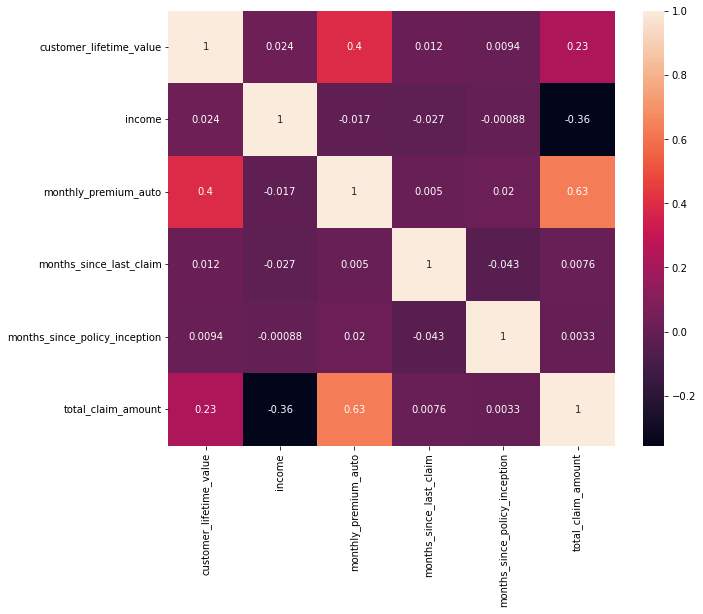

In [13]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

**Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)**

In [26]:
def histplot(x):
    for i in x.columns:
        plt.title(i, fontsize=16)
        plt.figure()
        plt.hist(x[i])

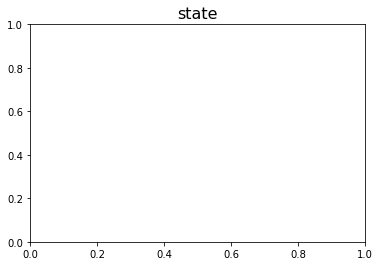

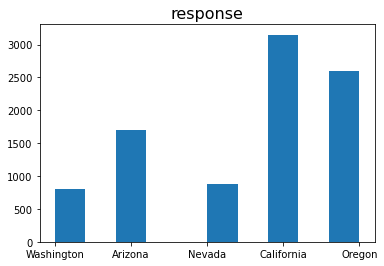

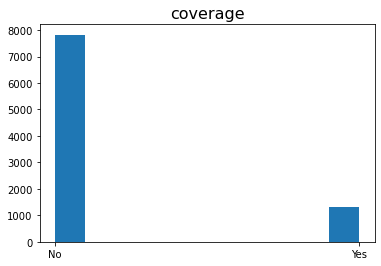

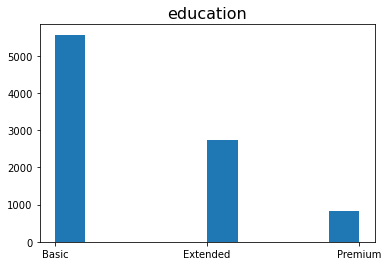

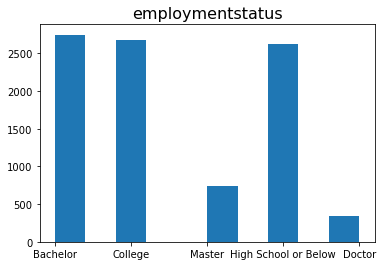

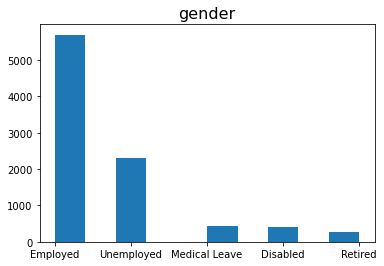

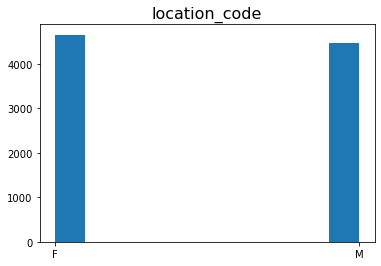

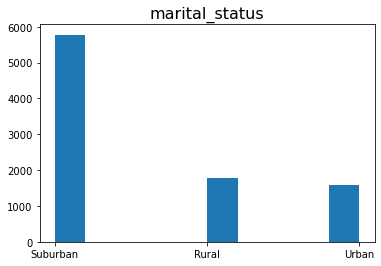

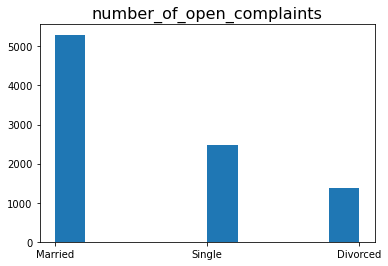

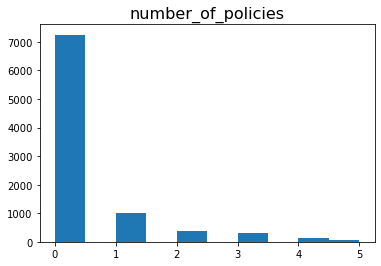

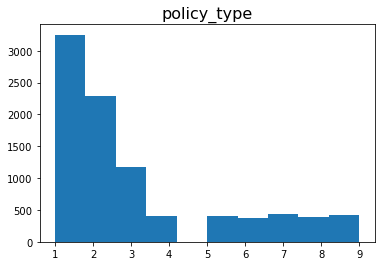

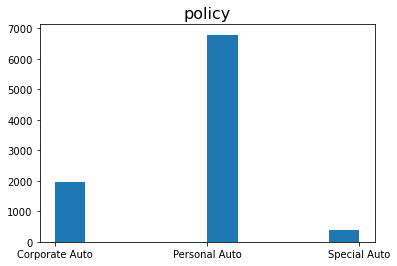

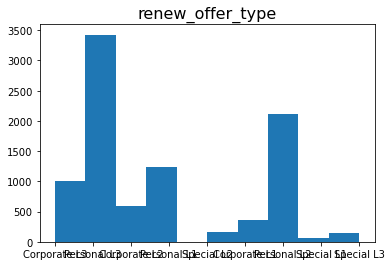

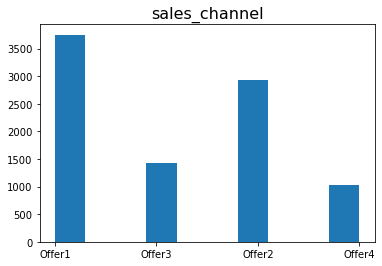

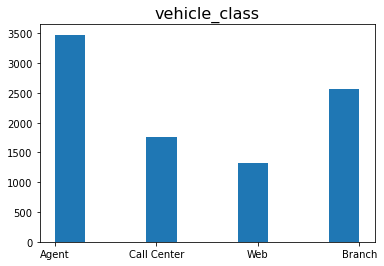

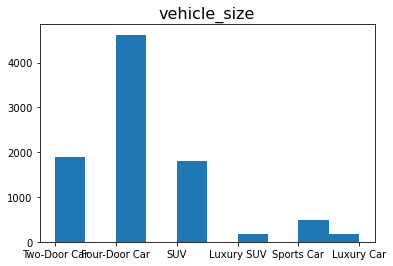

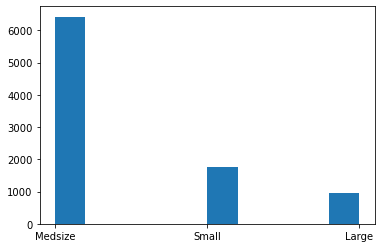

In [27]:
histplot(discrete_df)

**Comment what you can see in the plots.**

The plots show a heavy imbalance with the car type, size and policy. We can also see that the sales channel is relatively well-balanced, with agent and branches being the most effective ways of making sales

**Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)**

In [16]:
def contplot(x):
    for i in x.columns:
        if 'effective_to_date' != i:
            sns.boxplot(y=x[i])
            plt.title(i, fontsize=16)
            plt.show()

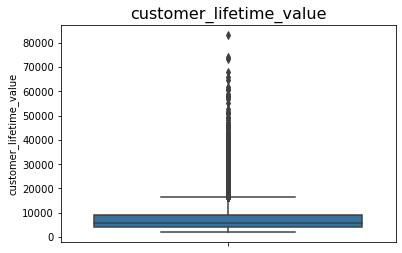

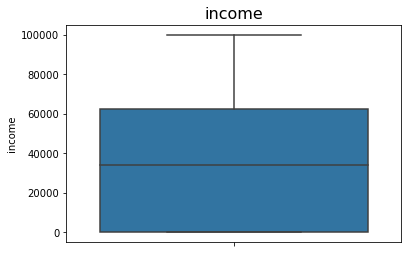

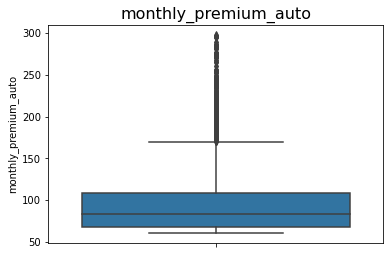

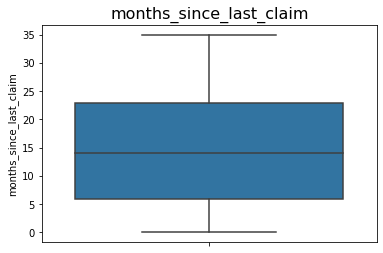

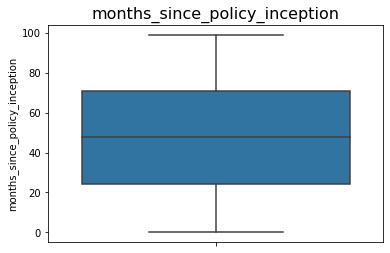

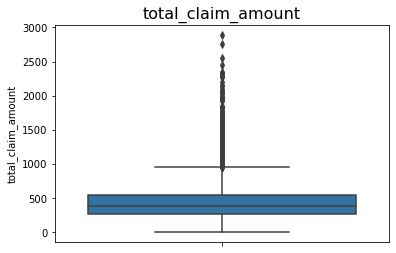

In [17]:
contplot(continuous_df)

**Did you find outliers? Comment what you will do with them.**

There are some outliers, especially with customer_lifetime_value, monthly_premium_auto and total_claim_amount. We could do something with the customer lifetime value column, as the outliers are very much outside of the interquartile range. We won't change anything for now, however, as these are just people who make more money. They shouldn't be dropped

**Check all columns for NaN values. Decide what (if anything) you will need to do with them.**

In [18]:
#there are 0 NaN values. Lucky me! 
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

**Find all of the categorical data. Save it in a categorical_df variable.**

In [19]:
categorical_df = customer_df.select_dtypes(include=np.object)

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_79404/2601907229.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=np.object)


**Check for NaN values.**

In [20]:
categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

**Check all unique values of columns.**

In [21]:
#Thanks stackoverflow!!

unique_values = pd.Series({c: customer_df[c].unique() for c in customer_df})
unique_values

state                            [Washington, Arizona, Nevada, California, Oregon]
customer_lifetime_value          [2763.519279, 6979.535903, 12887.43165, 7645.8...
response                                                                 [No, Yes]
coverage                                                [Basic, Extended, Premium]
education                        [Bachelor, College, Master, High School or Bel...
effective_to_date                [2011-02-24T00:00:00.000000000, 2011-01-31T00:...
employmentstatus                 [Employed, Unemployed, Medical Leave, Disabled...
gender                                                                      [F, M]
income                           [56274, 0, 48767, 43836, 62902, 55350, 14072, ...
location_code                                             [Suburban, Rural, Urban]
marital_status                                         [Married, Single, Divorced]
monthly_premium_auto             [69, 94, 108, 106, 73, 67, 101, 71, 93, 110, 7...
mont

**Check dtypes. Do they all make sense as categorical data?**

In [22]:
#yes, they all make sense being separated into categories
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

**Does any column contain alpha and numeric data? Decide how to clean it.**

In [23]:
customer_df.vehicle_size.value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

**Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.**

Not really, the data is relatively clean, there are no NaN values. We will, however check for outliers 

**Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?**

In [24]:
categorical_df.groupby(["policy_type",'policy'])['gender'].count()

policy_type     policy      
Corporate Auto  Corporate L1     359
                Corporate L2     595
                Corporate L3    1014
Personal Auto   Personal L1     1240
                Personal L2     2122
                Personal L3     3426
Special Auto    Special L1        66
                Special L2       164
                Special L3       148
Name: gender, dtype: int64

We can drop the policy_type column, as the type is already included in policy column

**Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.**

In [25]:
categorical_df.nunique()

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64